![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrais e Primitivas

Neste teste, vamos usar os métodos de integração para calcular primitivas de funções.

De forma análoga ao caso de EDOs, vamos retornar dois `np.array`s:
- um com os pontos onde a primitiva foi calculada; e
- outro com o valor da aproximação numérica da primitiva.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 0: o método do retângulo

Para evitar efeitos de bordo e arredondamento, vamos usar o método do retângulo criando pontos com `np.linspace`:

In [2]:
def retangulo(f, a, b, n=1000): # o que essa função faz é calcular a área aproximada abaixo de uma curva e é isso
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True) # h = (b-a)/n
    fs = f(pts)
    return h*np.sum(fs) # integral =~ h*f(x_0) + h*f(x_1) + ... + h*f(x_n-1) = h*(f(x_0) + f(x_1) + ... + f(x_n-1))

Explique porque os pontos criados têm `endpoint=False`

Por que o método do retângulo usa, por padronização (sei lá quem definiu isso, mas assim Bernardo explicou), o valor de $f(x_i)$ à esquerda de cada intervalo. Dessa forma, se incluíssemos o último ponto do intervalo na função da aproximação da integral pelo método do retângulo, teríamos a área aproximada abaixo da curva + um pedaço retangular pequeno de área que já se encontra fora do intervalo que a gente tá analisando.

In [3]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) < 1e-3

In [4]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) > 1e-4

In [5]:
ans = (np.cos(0) - np.cos(2))
assert 1e-5 < abs(retangulo(np.sin, 0, 2, n=10**4) - ans) < 1e-4

# Questão 1: O jeito fácil

Escreva uma função `primitiva_retangulo`,
que calcula a integral de $a$ até cada um dos pontos escolhidos,
**incluindo** $a$,
chamando o método do retângulo para cada um deles.

In [6]:
def primitiva_retangulo(f, a, b, h=0.01): # essa aqui calcula a área acumulada até cada x_i
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    Fs = np.array([retangulo(f, a, x_i, n = round((x_i-a)/h)) for x_i in pts])
    # cada valor é a integral de 'a' até o x desse valor, chamando o método do retângulo
    return pts, Fs

# usei o 'round' porque ocorrem algumas coisas indesejadas quando se usa simplesmente
# a função built-in 'int' do python. ex: quando 'int' recebe 28.99999999999999
# ele arredonda pra 28, sendo que deveria arredondar pra 29. o 'round' corrige isso

In [7]:
# Veja:
pts = np.arange(0, 1, 0.01)
for x_i in pts: # isso aqui é a mesma coisa que é feita acima ao se calcular cada 'n'
    print(round(x_i/0.01), int(x_i/0.01))
    # pode só olhar direto pra onde o 29, 58 e 59 deveriam estar. com esses parâmetros, o erro ocorre lá
    # esse errinho parece bem desprezível, mas mesmo assim é erro e resolvi mexer nisso

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 28
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 57
59 58
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99


In [8]:
pts, Fs = primitiva_retangulo(np.sin, 0, 1)
assert len(Fs) == len(pts)

In [9]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [10]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

## Questão 2: Gráficos

Faça os gráficos dos erros de cálculo das primitivas, no intervalo $[0, 1.5]$, das seguintes funções:
- Seno
- Exponencial
- Cosseno

para quatro valores de passo: `1e-2`, `5e-3`, `2e-3` e `1e-3`.

Use 3 eixos, um para cada função, e 4 curvas em cada eixo.

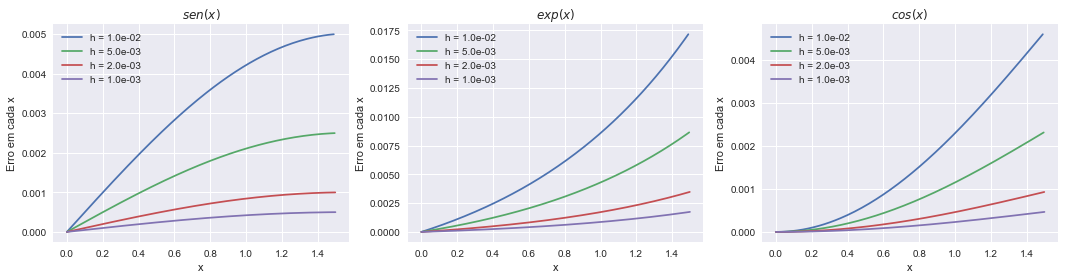

In [11]:
plt.style.use('seaborn')

fig, axs = plt.subplots(ncols=3, figsize=(18,4))
hs = [1e-2, 5e-3, 2e-3, 1e-3]

# ax0
axs[0].set_title('$sen(x)$')
for h in hs:
# a primitiva de sen(x) é -cos(x) + k
    xs, primitiva_numérica = primitiva_retangulo(np.sin, 0, 1.5, h)
    primitiva_original = - np.cos(xs) + 1 # área abaixo da curva de sen(x), afinal é isso que a função faz
    erro_sen = abs(primitiva_original - primitiva_numérica)
    axs[0].plot(xs, erro_sen, label=f'h = {h:.1e}')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('Erro em cada x')
    axs[0].legend()

# ax1
axs[1].set_title('$exp(x)$')
for h in hs:
# a primitiva de exp(x) é exp(x) + k
    xs, primitiva_numérica = primitiva_retangulo(np.exp, 0, 1.5, h)
    primitiva_original = np.exp(xs) - 1 # área abaixo da curva de exp(x)
    erro_exp = abs(primitiva_original - primitiva_numérica)
    axs[1].plot(xs, erro_exp, label=f'h = {h:.1e}')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Erro em cada x')
    axs[1].legend()

# ax2
axs[2].set_title('$cos(x)$')
for h in hs:
# a primitiva de cos(x) é sen(x) + k
    xs, primitiva_numérica = primitiva_retangulo(np.cos, 0, 1.5, h)
    primitiva_original = np.sin(xs) # área abaixo da curva de cos(x)
    erro_cos = abs(primitiva_original - primitiva_numérica)
    axs[2].plot(xs, erro_cos, label=f'h = {h:.1e}')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('Erro em cada x')
    axs[2].legend()

plt.show()

In [12]:
for ax in axs:
    assert len(ax.lines) == 4
    assert len(ax.get_legend().texts) == 4
    assert len(ax.get_title()) > 0

In [13]:
for ax in axs:
    for l in ax.lines:
        assert max(np.abs(l.get_ydata())) < 2e-2

Qual o erro, na extremidade final do intervalo, para cada um dos métodos e valores de $h$?

Imprima uma tabela, com 3 colunas e 4 linhas (fora as "de título"), usando `print` formatado.

In [14]:
# criando um dicionário com listas nas chaves pra acessar os valores, fazer umas contas e printar depois com umas
# configurações
hs_e_erros = {1e-2:[], 5e-3:[], 2e-3:[], 1e-3:[]}
for h in hs_e_erros:
#
    xs, primitiva_numérica = primitiva_retangulo(np.sin, 0, 1.5, h)
    primitiva_original = - np.cos(xs) + 1
    hs_e_erros[h].append(abs((primitiva_original - primitiva_numérica)[-1]))
#
    xs, primitiva_numérica = primitiva_retangulo(np.exp, 0, 1.5, h)
    primitiva_original = np.exp(xs) -1
    hs_e_erros[h].append(abs((primitiva_original - primitiva_numérica)[-1]))
#
    xs, primitiva_numérica = primitiva_retangulo(np.cos, 0, 1.5, h)
    primitiva_original = np.sin(xs)
    hs_e_erros[h].append(abs((primitiva_original - primitiva_numérica)[-1]))

# maior_comprimento_hs
maior_len_str_h = 0
# maior_comprimento_erro
maior_len_str_erro = 0
# loop pra calcular os dois valores acima
for h in hs_e_erros:
    len_str_h = len(str(h))
    if len_str_h>maior_len_str_h:
        maior_len_str_h = len_str_h
    for erro in hs_e_erros[h]:
        len_str_erro = len(str(erro))
        if len_str_erro>maior_len_str_erro:
            maior_len_str_erro = len_str_erro

# parte do print
l = ['Erro no último ponto para cada h e cada função', 'sen(x)', 'exp(x)', 'cos(x)']
# criando uma lista com umas strings pra poder acessar depois e usar nas format strings, talvez isso seja uma gambiarra

k = 4*len(' |') # esse k parece meio perdido mas a fstring não deixou eu inserir ele dentro dela
# acabou sendo mais prático também, foi usado mais de uma vez
print('-'*(3*maior_len_str_erro+maior_len_str_h+k+1))
print(f'{l[0]:^{3*maior_len_str_erro+maior_len_str_h+k+1}}')
print('-'*(3*maior_len_str_erro+maior_len_str_h+k+1))
print('|hs', end='    |')

for i in range(1, len(l)):
    print(f'{l[i]:^{maior_len_str_erro}}', end=' |')
print() # pra pular pra próxima linha
print('-'*(3*maior_len_str_erro+maior_len_str_h+k+1))

for h in hs_e_erros:
    print(f'|{h:<{maior_len_str_h}}', end=' |')
    for erro in hs_e_erros[h]:
        print(f'{erro:<{maior_len_str_erro}}', end=' |')
    print()

# acabou ficando gigante, acho que tem um jeito mais fácil

--------------------------------------------------------------------------------
                 Erro no último ponto para cada h e cada função                 
--------------------------------------------------------------------------------
|hs    |        sen(x)         |        exp(x)         |        cos(x)         |
--------------------------------------------------------------------------------
|0.01  |0.004991349535913403   |0.01715683518009703    |0.0045881515959486086  |
|0.005 |0.002494747659798402   |0.008641134433971409   |0.0023086132183820496  |
|0.002 |0.0009976606066433025  |0.003471577071463283   |0.0009269355006354951  |
|0.001 |0.0004987892307796171  |0.0017383150432195293  |0.00046404955079315524 |


Como os erros se comportam ao diminuir o passo?  Isso é esperado?

Os erros variam numa proporção **muito** próxima da que os `hs` variam, para todas as funções. Eu esperaria que isso ocorresse. Analiticamente, reduzir o tamanho de cada `h` é refinar melhor o intervalo e aproximar melhor a integral e reduzir o erro da aproximação.

Obs: se a pergunta do "isso é esperado?" for em relação à razão numérica com a qual os erros variam em si, e não em relação apenas ao fato de diminuir ou aumentar, eu mostro as contas que explicam isso na questão após a que está abaixo. Resumindo, o erro é diretamente proporcional ao tamanho de h, se for desconsiderado um erro de tamanho $o(h)$ que tá embutido nos cálculos dessas integrais.

Como os erros se comportam ao longo do eixo dos $x$, ou seja, ao calcular primitivas "cada vez mais longe"?  Como você explica este fenômeno?

Os erros são maiores à medida que se calcula primitivas cada vez mais longe. Isso se deve ao fato de que os erros se acumulam. Isto é: há um certo erro quando se calcula a integral de $a_0$ até $a_1$. Quando se calcula a integral de $a_0$ até $a_2$, há o erro devido ao cálculo de $a_0$ até $a_1$ mais o erro devido ao cálculo de $a_1$ até $a_2$. E assim os erros vão se acumulando.

Como os erros se comportam para as diferentes funções?  Você esperava isso?

Os erros nas funções seno e cosseno são bem próximos e ambos são menores do que os erros na função exponencial. Sim, eu esperava. Os erros de integração usando o método do retângulo podem ser estimados por: $h \frac{f(b)-f(a)}{2}$ (mais um errinho da ordem de h: $o(h)$), com sinal positivo ou negativo. Aqui, como eu to usando o erro em módulo, vou padronizar pra mostrar esses valores só com sinal positivo.

Como a diferença `np.exp(1.5)-np.exp(0)` é maior, em módulo, que as diferenças `np.sin(1.5)-np.sin(0)` e `np.cos(1.5)-np.cos(0)`, os erros na função `exp` serão consequentemente maiores, com base no que eu falei acima.

Tudo pode ser visto nas células abaixo, onde eu resolvi calcular essas estimativas usando a fórmula que eu mostrei acima:

In [15]:
print('seno: ', 0.01*(np.sin(1.5)-np.sin(0))/2, end=', ')
print('exponencial: ', 0.01*(np.exp(1.5)-np.exp(0))/2, end=', ')
print('cosseno: ', abs(0.01*(np.cos(1.5)-np.cos(0))/2), end='.')

seno:  0.004987474933020273, exponencial:  0.017408445351690324, cosseno:  0.004646313991661486.

In [16]:
print('seno: ', 0.005*(np.sin(1.5)-np.sin(0))/2, end=', ')
print('exponencial: ', 0.005*(np.exp(1.5)-np.exp(0))/2, end=', ')
print('cosseno: ', abs(0.005*(np.cos(1.5)-np.cos(0))/2), end='.')

seno:  0.0024937374665101363, exponencial:  0.008704222675845162, cosseno:  0.002323156995830743.

In [17]:
print('seno: ', 0.002*(np.sin(1.5)-np.sin(0))/2, end=', ')
print('exponencial: ', 0.002*(np.exp(1.5)-np.exp(0))/2, end=', ')
print('cosseno: ', abs(0.002*(np.cos(1.5)-np.cos(0))/2), end='.')

seno:  0.0009974949866040546, exponencial:  0.0034816890703380644, cosseno:  0.0009292627983322971.

In [18]:
print('seno: ', 0.001*(np.sin(1.5)-np.sin(0))/2, end=', ')
print('exponencial: ', 0.001*(np.exp(1.5)-np.exp(0))/2, end=', ')
print('cosseno: ', abs(0.001*(np.cos(1.5)-np.cos(0))/2), end='.')

seno:  0.0004987474933020273, exponencial:  0.0017408445351690322, cosseno:  0.00046463139916614856.

## Questão 3: O jeito mais rápido

Na questão anterior, ao calcular a primitiva de $[a, a+2h]$, era necessário calcular $f(a)$ e $f(a+h)$.
Ora, $f(a)$ já tinha sido calculada para a primitiva em $[a, a+h]$ (era o único termo!),
então podemos evitar estas contas repetidas.

Vamos fazer uma nova primitiva, `primitiva_rapida`, que calcula apenas uma vez `f(pts)`,
e calcula as somas parciais usando [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).

Explique porque é ruim (neste caso!) que `np.cumsum` **não** retorne a soma vazia.

In [19]:
np.cumsum([1,2])

array([1, 3], dtype=int32)

Pois a soma acumulada do primeiro elemento até o primeiro elemento na integral (de $f(a)$ até $f(a)$) equivale à soma de elemento nenhum, $0$. Assim, seria legal se `np.cumsum` retornasse esse valor.

Para incluir a soma vazia (que vale zero!), use `np.hstack`.

In [20]:
np.hstack([[0], [1, 3]])

array([0, 1, 3])

In [21]:
def primitiva_rapida(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    fs = f(pts)
    primitiva = h*np.cumsum(fs)
    primitiva = np.hstack(([0], primitiva)) # tem que adicionar a soma vazia
    primitiva = np.delete(primitiva, [-1]) # e tem que deletar o último elemento
    return pts, primitiva

In [22]:
pts, Fs = primitiva_rapida(np.sin, 0, 1)
assert len(pts) == len(Fs)

In [23]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [24]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

Ambas as funções devem ser (a menos de erro de truncamento / arredondamento) iguais:

In [25]:
_, Fs_original = primitiva_retangulo(np.sin, 0, 1)
assert np.allclose(Fs, Fs_original, atol=1e-15, rtol=1e-15)

## Questão 4: E terá valido a pena?

Observe as duas caixas abaixo

In [26]:
%time primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%time primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

Wall time: 817 ms
Wall time: 52.9 ms


In [27]:
%time primitiva_rapida(np.sin, 0, 1, h=1e-4)
%time primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

Wall time: 998 µs
Wall time: 0 ns


Quão mais rápido é o método usando `np.cumsum`?

Na primeira comparação, o primeiro é entre $10^{3}$ e $10^{2}$ vezes mais rápido. Na segunda, ele é entre $10^{2}$ e $10^{1}$ vezes mais rápido. Esses números oscilam um pouco, o que dificulta falar o quão mais rápida a primitiva rápida é em um único número. Basta rodar as células mais de uma vez e dá pra ver que o número não é constante. Acho que isso depende das outras coisas que rodam no computador enquanto se faz os testes. (como esses valores oscilam, botei a ordem de grandeza da razão entre as velocidades)

Agora, observe com mais detalhe:

In [28]:
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

871 ms ± 42.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
53.4 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-4)
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

163 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
57.8 µs ± 4.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Quantas vezes mais lento é o método "simples" com passo 10 vezes menor?

E quantas vezes mais lento é o método `np.cumsum` com passo 10 vezes menor?

Isso ajuda a explicar as diferenças acima?

O método simples com passo 10 vezes menor é aproximadamente 15 vezes mais lento do que o mesmo método usando passo 10 vezes maior. E o método rápido com passo 10 vezes menor é aproximadamente 3 vezes mais lento que o mesmo método com passo 10 vezes maior.

Eu penso que essa diferença se deva ao fato do número de operações que cada função executa ao receber cada valor de 'h', fixados os outros parâmetros. Não consegui deduzir uma fórmula que entrega o número de operações pra cada h, sei apenas da relação óbvia que é: h menor implica em mais intervalos, o que tem como consequência mais contas.

Pelas contas que eu havia feito, o número de operações que a primitiva 'lenta' que eu escrevi faz é de aproximadamente $\frac{(n+1)(n+2)}{2}$, sendo n o número de intervalinhos em que o intervalo de integração foi dividido. Com isso, supondo que as operações sempre demoram o mesmo tempo pra serem feitas, usar um $h$ 10 vezes menor equivaleria a fazer 100 vezes mais operações o que resultaria em demorar 100 vezes mais, mas não é bem isso que se observa nos testes acima.

Já a primitiva rápida que eu escrevi faz aproximadamente $n+1$ operações, sendo n o número de intervalinhos em que o intervalo de integração foi dividido. E aí, usar um $h$ 10 vezes menor equivaleria a fazer 10 vezes mais operações e isso resultaria em demorar 10 vezes mais. Coloquei isso só pra deixar o que eu havia pensado, mas acho que não é bem essa a resposta certa.